In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/mohit/Documents/Minor_Project/code/Data_Downloading/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0  7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1  7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2  7.6  15.7  2.7  1017.4  80.0  0.6  0.9   7.6  115.287500
3  6.6  12.6  1.9  1018.5  87.0  0.6  2.8  11.1   12.379167
4  6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500

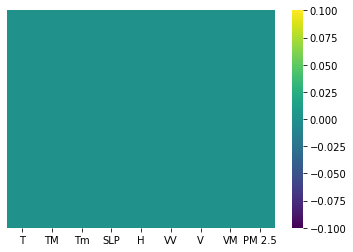

In [4]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [5]:
df=df.dropna()

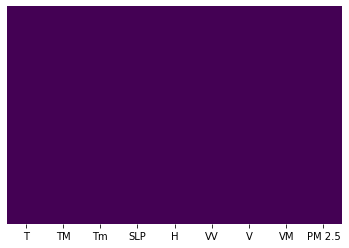

In [6]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [8]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...    ...
1150  False  False  False  False  False  False  False  False
1151  False  False  False  False  False  False  False  False
1152  False  False  False  False  False  False  False  False
1153  False  False  False  False  False  False  False  False
1154  False  False  False  False  False  False  False  False

[1155 rows x 8 columns]

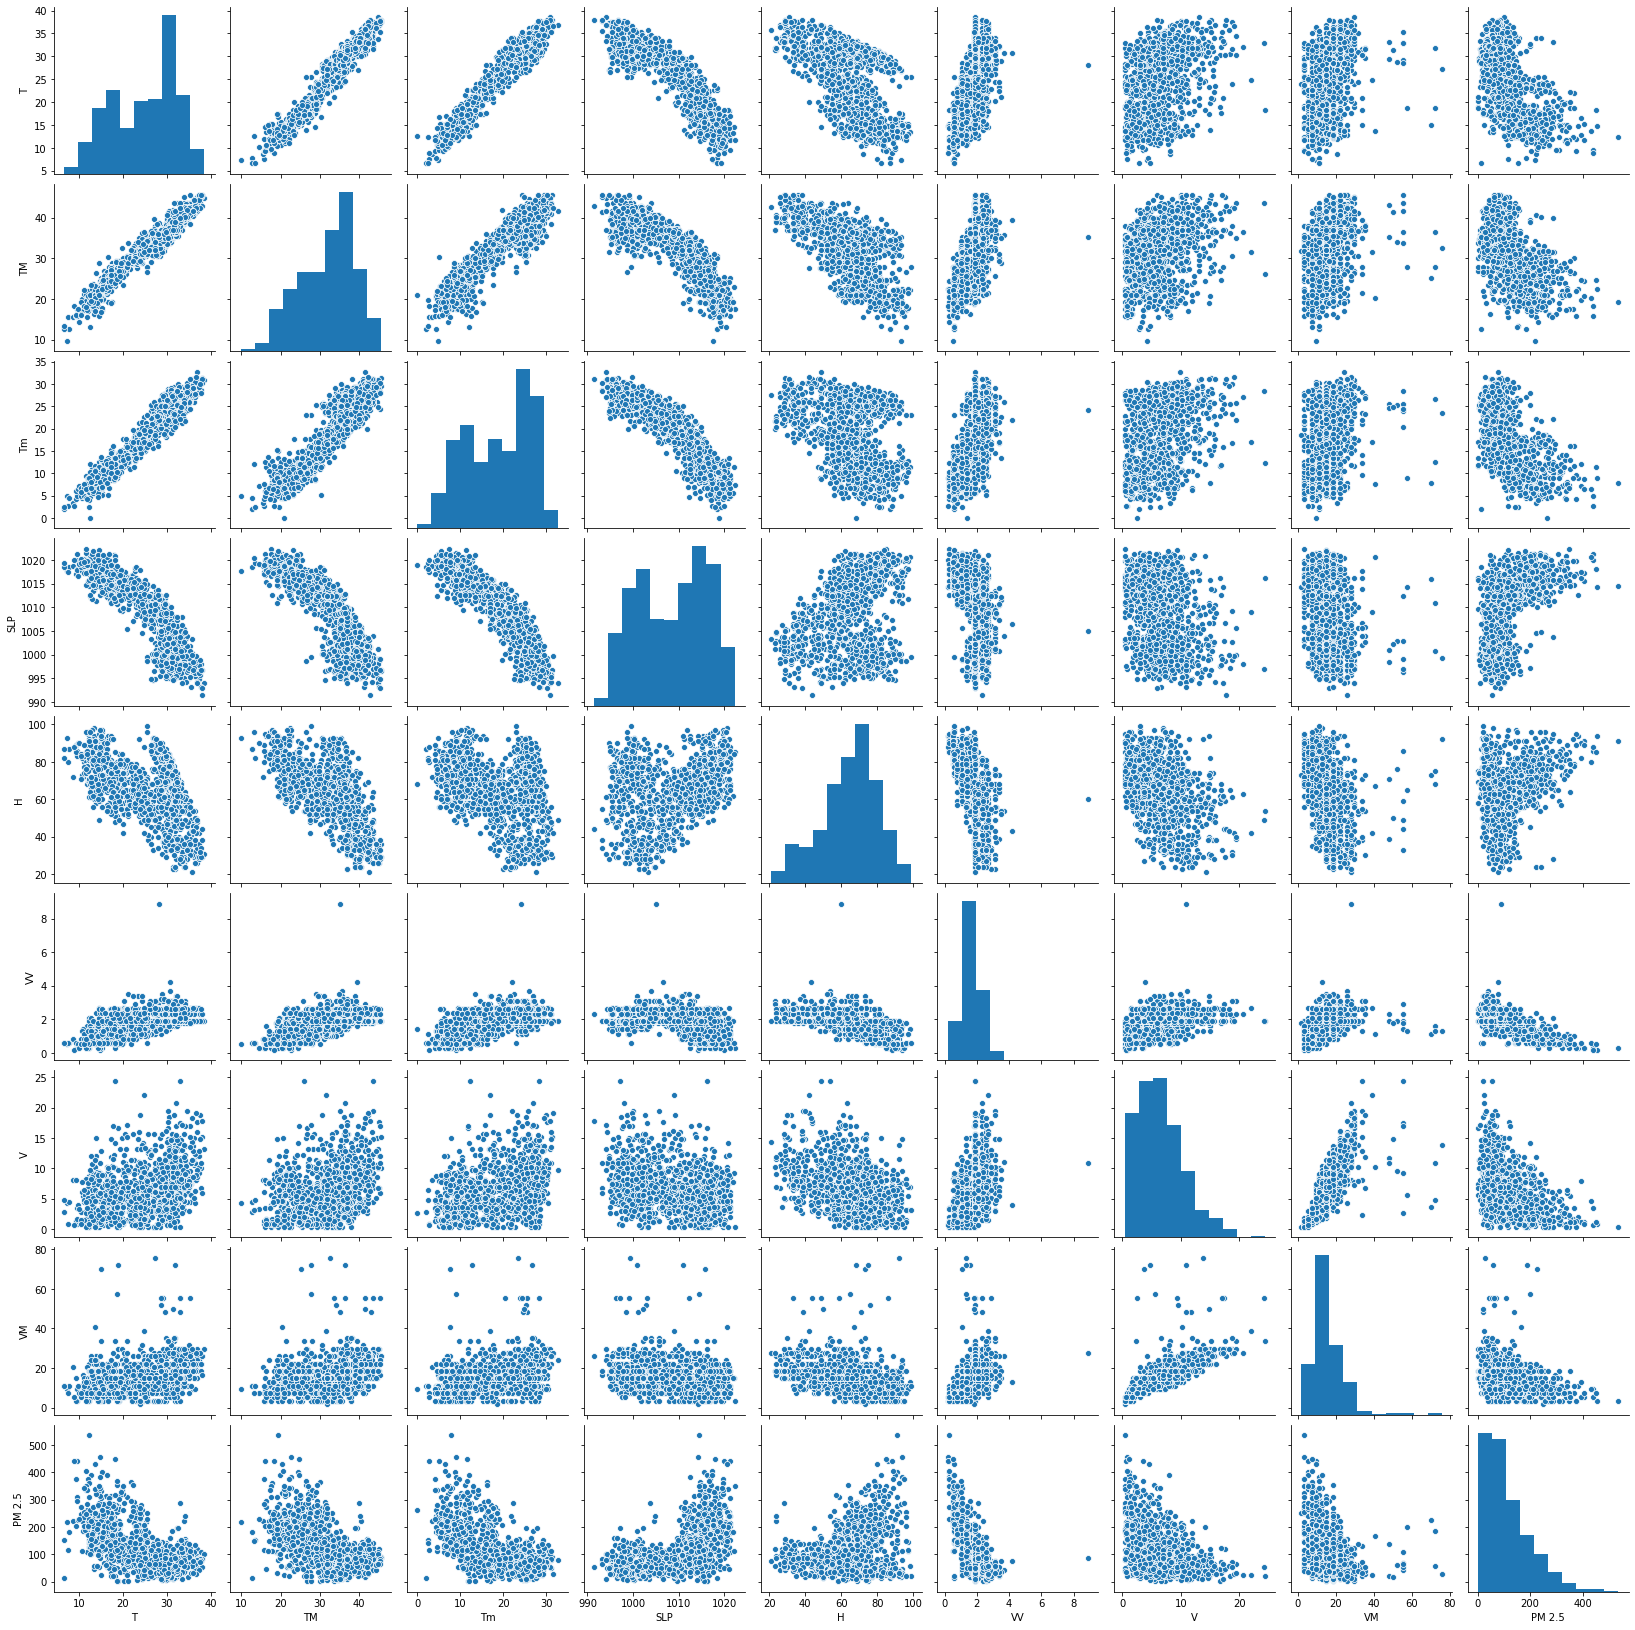

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967033  0.960761 -0.888843 -0.544565  0.586565  0.342204   
TM      0.967033  1.000000  0.899057 -0.838290 -0.622354  0.583805  0.322313   
Tm      0.960761  0.899057  1.000000 -0.909013 -0.348847  0.512387  0.331165   
SLP    -0.888843 -0.838290 -0.909013  1.000000  0.314512 -0.429380 -0.332249   
H      -0.544565 -0.622354 -0.348847  0.314512  1.000000 -0.538594 -0.404380   
VV      0.586565  0.583805  0.512387 -0.429380 -0.538594  1.000000  0.420378   
V       0.342204  0.322313  0.331165 -0.332249 -0.404380  0.420378  1.000000   
VM      0.266351  0.272134  0.247374 -0.270540 -0.343476  0.331313  0.733795   
PM 2.5 -0.639066 -0.582018 -0.673804  0.611188  0.256154 -0.682019 -0.434869   

              VM    PM 2.5  
T       0.266351 -0.639066  
TM      0.272134 -0.582018  
Tm      0.247374 -0.673804  
SLP    -0.270540  0.611188  
H      -0.343476  0.256154  
VV      0.331313 -0.682019  
V       0.733795 -0.434869  
VM      1.000000 -0.336176  
PM 2.5 -0.336176  1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

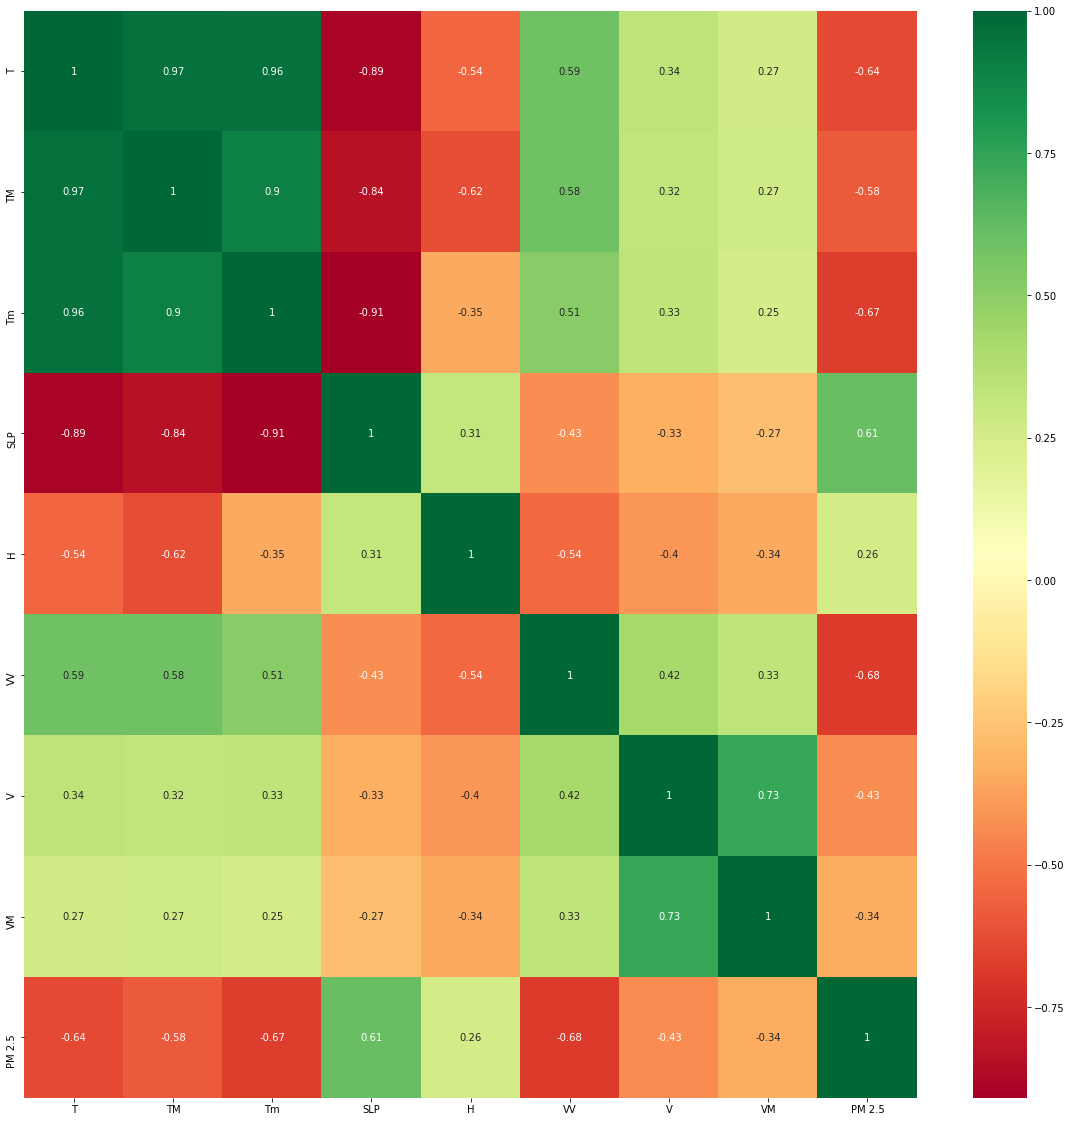

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0  7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1  7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2  7.6  15.7  2.7  1017.4  80.0  0.6  0.9   7.6
3  6.6  12.6  1.9  1018.5  87.0  0.6  2.8  11.1
4  6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1

In [15]:
print(model.feature_importances_)

[0.10720325 0.10066797 0.18298887 0.12864327 0.05924609 0.33387635
 0.05168494 0.03568926]


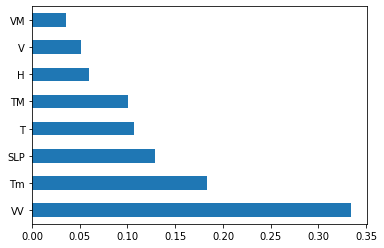

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Decision Tree Regression

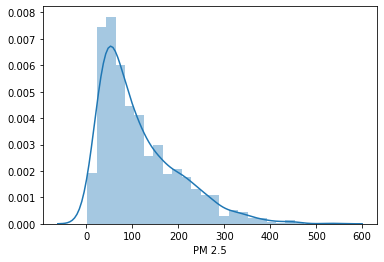

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [22]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.5498609778274315


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [24]:
score.mean()

0.30678279982502693


### Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [25]:

##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [26]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [27]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [28]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.775826 to fit



### Model Evaluation

In [29]:
prediction=dtree.predict(X_test)

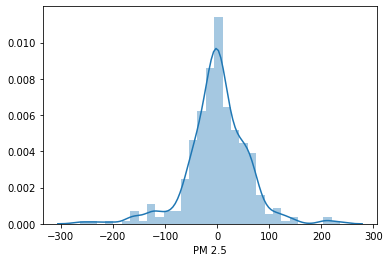

In [30]:
sns.distplot(y_test-prediction)

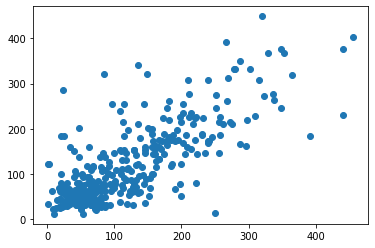

In [31]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning Decision Tree Regressor

In [32]:
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [34]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [35]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [36]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [37]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 2968 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 6552 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 11160 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 16792 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 23448 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 31128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 39832 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 49560 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 60312 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 72088 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 84888 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 98712 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 3 minutes and 46.92 seconds.


In [38]:
random_search.best_params_

{'max_depth': 12,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [39]:
random_search.best_score_

-2718.2200124198853

In [40]:
predictions=random_search.predict(X_test)

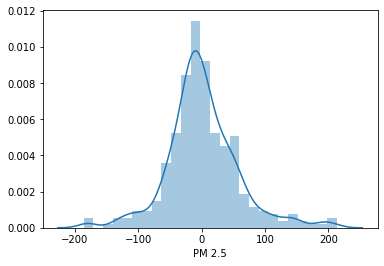

In [41]:
sns.distplot(y_test-predictions)

In [42]:
from sklearn import metrics
print('Decision Tree')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Decision Tree
MAE: 40.36462535187292
MSE: 3223.7544176057077
RMSE: 56.77811565740543


In [43]:
import pickle
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)